In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro, probplot
from statsmodels.stats.stattools import durbin_watson
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPRegressor

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940

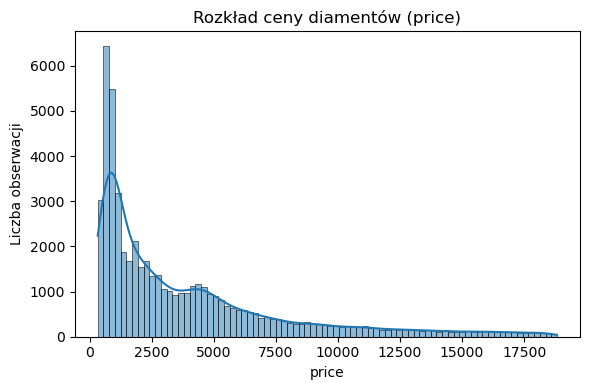

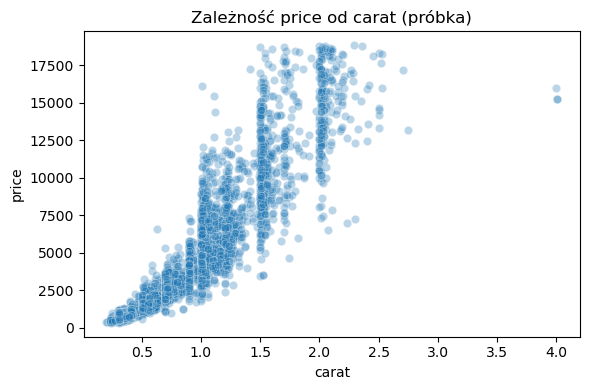

In [12]:
df = pd.read_csv("diamonds.csv")

print(df.head())
print(df.info())

plt.figure(figsize=(6,4))
sns.histplot(df["price"], kde=True)
plt.title("Rozkład ceny diamentów (price)")
plt.xlabel("price")
plt.ylabel("Liczba obserwacji")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df.sample(min(5000, len(df)), random_state=42),
    x="carat", y="price", alpha=0.3
)
plt.title("Zależność price od carat (próbka)")
plt.tight_layout()
plt.show()

In [13]:
#POMOCNICZE: Przygotowanie danych

#Cl i cechy
y = df["price"]
X = df.drop(columns=["price"])

#One-hot encoding dla zmiennych kategorycznych
categorical_cols = ["cut", "color", "clarity"]
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# unkcja do liczenia metryk
def compute_metrics(y_true, y_pred):
    return {
        "R2":  r2_score(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
    }


METRYKI – dane ORYGINALNE:
Linear Regression: {'R2': 0.9193399796988827, 'MSE': 1282237.9409818375, 'MAE': 737.1353607728876}
Ridge Regression:  {'R2': 0.9193469185159848, 'MSE': 1282127.6358452816, 'MAE': 736.9789411403872}
MLP Regressor:     {'R2': 0.9901390053058534, 'MSE': 156758.4719846672, 'MAE': 278.57940978686094}


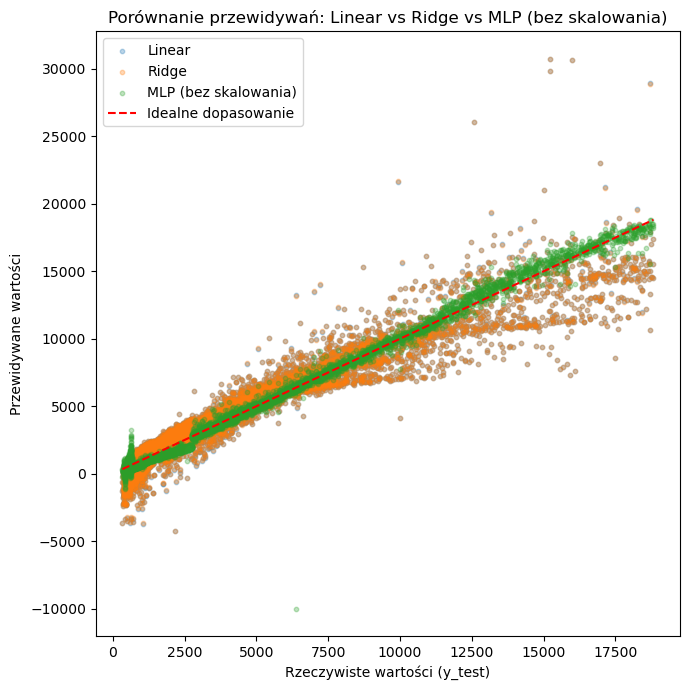

In [17]:

# PUNKT 1: Linear, Ridge, MLP – dane ORYGINALNE

#Regresja liniowa
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)
metrics_lin = compute_metrics(y_test, y_pred_lin)

#Ridge
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
metrics_ridge = compute_metrics(y_test, y_pred_ridge)

#Sieć neuronowa (MLP) bez skalowania (słabsza)
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
metrics_mlp = compute_metrics(y_test, y_pred_mlp)

print("\nMETRYKI – dane ORYGINALNE:")
print("Linear Regression:", metrics_lin)
print("Ridge Regression: ", metrics_ridge)
print("MLP Regressor:", metrics_mlp)

#Wykres: porównanie przewidywań Linear vs Ridge vs MLP bez doapsowania

plt.figure(figsize=(7,7))

plt.scatter(y_test, y_pred_lin,   alpha=0.3, s=10, label="Linear")
plt.scatter(y_test, y_pred_ridge, alpha=0.3, s=10, label="Ridge")
plt.scatter(y_test, y_pred_mlp,   alpha=0.3, s=10, label="MLP (bez skalowania)")

line = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(line, line, "r--", label="Idealne dopasowanie")

plt.xlabel("Rzeczywiste wartości (y_test)")
plt.ylabel("Przewidywane wartości")
plt.title("Porównanie przewidywań: Linear vs Ridge vs MLP (bez skalowania)")
plt.legend()
plt.tight_layout()
plt.show()



Top 10 cech wg |współczynników| (Ridge, oryginalna skala):
carat           11179.902817
clarity_IF       5302.613951
clarity_VVS1     4959.868772
clarity_VVS2     4899.809134
clarity_VS1      4528.556136
clarity_VS2      4210.202846
clarity_SI1      3626.162379
clarity_SI2      2661.154143
color_J          2373.075355
color_I          1480.527532
dtype: float64


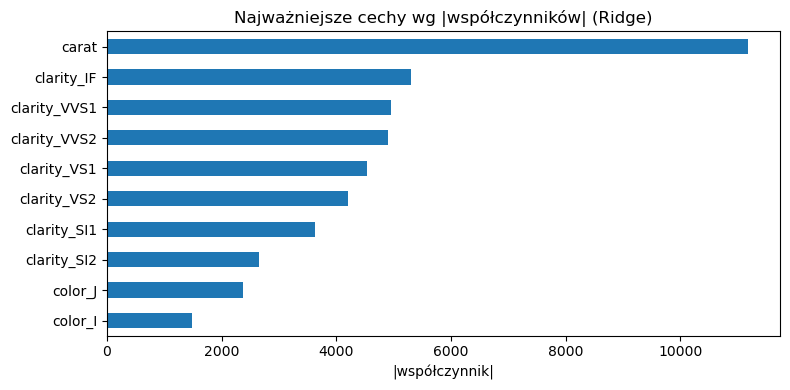


Top 10 cech wg |współczynników| (Linear Regression):
carat           11209.516730
clarity_IF       5361.888766
clarity_VVS1     5016.954896
clarity_VVS2     4956.434421
clarity_VS1      4584.894747
clarity_VS2      4265.976489
clarity_SI1      3681.766622
clarity_SI2      2715.648158
color_J          2377.285894
color_I          1483.537686
dtype: float64


In [18]:
#PUNKT 2: Wpływ zmiennych – ważność cech w Ridge

coef_ridge = pd.Series(ridge.coef_, index=X.columns)
coef_top10 = coef_ridge.abs().sort_values(ascending=False).head(10)

print("\nTop 10 cech wg |współczynników| (Ridge, oryginalna skala):")
print(coef_top10)

plt.figure(figsize=(8,4))
coef_top10.sort_values().plot(kind="barh")
plt.title("Najważniejsze cechy wg |współczynników| (Ridge)")
plt.xlabel("|współczynnik|")
plt.tight_layout()
plt.show()

coef_lin = pd.Series(lin.coef_, index=X.columns)
print("\nTop 10 cech wg |współczynników| (Linear Regression):")
print(coef_lin.abs().sort_values(ascending=False).head(10))

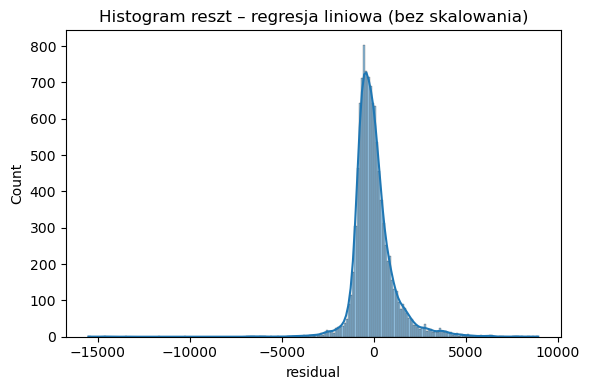

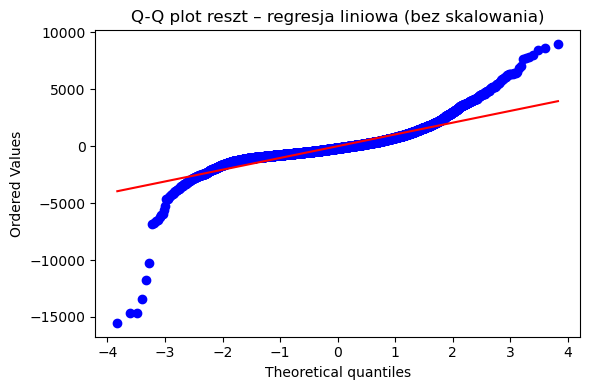


Test Shapiro–Wilka dla reszt (próbka): stat=0.8218, p=0.0000
Odrzucamy H0 – reszty różnią się istotnie od rozkładu normalnego.

Statystyka Durbin–Watsona dla reszt: 1.9828
≈2 oznacza brak istotnej autokorelacji; wartości <<2 lub >>2 sugerują autokorelację.



In [19]:
#PUNKT 3: Analiza reszt – regresja liniowa

residuals = y_test - y_pred_lin

#Histogram reszt
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Histogram reszt – regresja liniowa (bez skalowania)")
plt.xlabel("residual")
plt.tight_layout()
plt.show()

#Q–Q ploy
plt.figure(figsize=(6,4))
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot reszt – regresja liniowa (bez skalowania)")
plt.tight_layout()
plt.show()

#Test Shapiro–Wilka (na próbce, bo danych jest dużo)
sample_for_shapiro = residuals.sample(min(5000, len(residuals)), random_state=42)
stat_shap, p_shap = shapiro(sample_for_shapiro)
print(f"\nTest Shapiro–Wilka dla reszt (próbka): stat={stat_shap:.4f}, p={p_shap:.4f}")
if p_shap < 0.05:
    print("Odrzucamy H0 – reszty różnią się istotnie od rozkładu normalnego.")
else:
    print("Brak podstaw do odrzucenia H0 – rozkład reszt może być normalny.")

#Test Durbin–Watson
dw_stat = durbin_watson(residuals)
print(f"\nStatystyka Durbin–Watsona dla reszt: {dw_stat:.4f}")
print("≈2 oznacza brak istotnej autokorelacji; wartości <<2 lub >>2 sugerują autokorelację.\n")

In [20]:
#PUNKT 4: Porównanie modeli na danych ZNORMALIZOWANYCH

#Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

#Liniowa (scaled)
lin_s = LinearRegression()
lin_s.fit(X_train_scaled, y_train)
y_pred_lin_s = lin_s.predict(X_test_scaled)
metrics_lin_s = compute_metrics(y_test, y_pred_lin_s)

#Ridge (scaled)
ridge_s = Ridge(alpha=1.0, random_state=42)
ridge_s.fit(X_train_scaled, y_train)
y_pred_ridge_s = ridge_s.predict(X_test_scaled)
metrics_ridge_s = compute_metrics(y_test, y_pred_ridge_s)

# MLP (scaled) - bardziej dokładna?
mlp_s = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)
mlp_s.fit(X_train_scaled, y_train)
y_pred_mlp_s = mlp_s.predict(X_test_scaled)
metrics_mlp_s = compute_metrics(y_test, y_pred_mlp_s)

print("METRYKI – dane ZNORMALIZOWANE:")
print("Linear (scaled):", metrics_lin_s)
print("Ridge  (scaled):", metrics_ridge_s)
print("MLP    (scaled):", metrics_mlp_s)

METRYKI – dane ZNORMALIZOWANE:
Linear (scaled): {'R2': 0.9193399796988827, 'MSE': 1282237.9409818377, 'MAE': 737.135360772887}
Ridge  (scaled): {'R2': 0.9193414822068601, 'MSE': 1282214.0558807922, 'MAE': 737.1870944338762}
MLP    (scaled): {'R2': 0.9995775237691686, 'MSE': 6716.029208927995, 'MAE': 39.93568205573729}


C:\Users\artge\.conda\envs\mi-comp\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



PORÓWNANIE MODELI – oryginalne vs znormalizowane cechy:
                       R2           MSE         MAE
Linear (orig)    0.919340  1.282238e+06  737.135361
Ridge  (orig)    0.919347  1.282128e+06  736.978941
MLP    (orig)    0.990139  1.567585e+05  278.579410
Linear (scaled)  0.919340  1.282238e+06  737.135361
Ridge  (scaled)  0.919341  1.282214e+06  737.187094
MLP    (scaled)  0.999578  6.716029e+03   39.935682


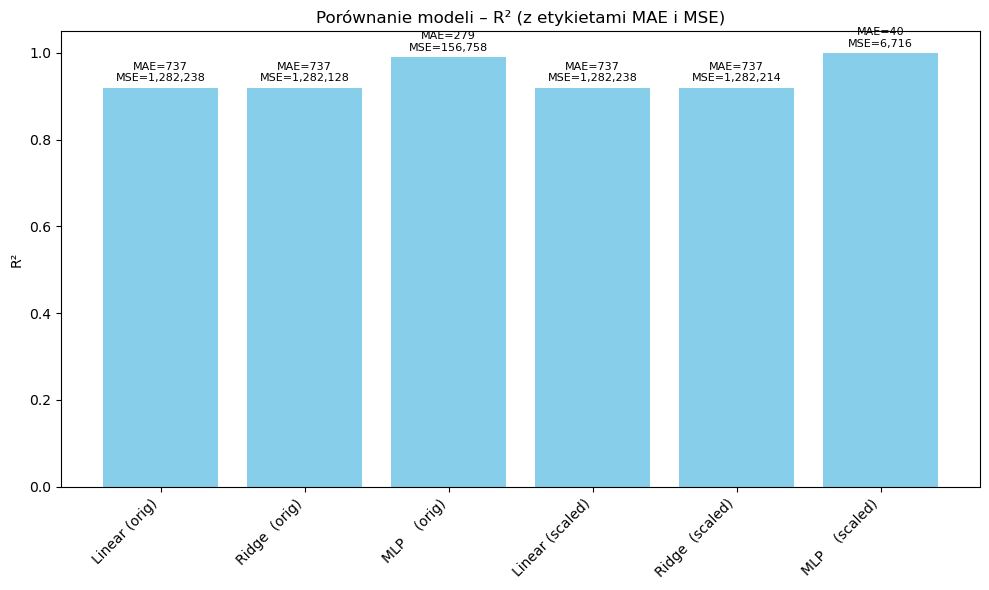

In [22]:
#Zbiorcze porównanie metryk (tabelka)

results = pd.DataFrame.from_dict(
    {
        "Linear (orig)":  metrics_lin,
        "Ridge  (orig)":  metrics_ridge,
        "MLP    (orig)":  metrics_mlp,
        "Linear (scaled)":metrics_lin_s,
        "Ridge  (scaled)":metrics_ridge_s,
        "MLP    (scaled)":metrics_mlp_s,
    },
    orient="index"
)

print("\nPORÓWNANIE MODELI – oryginalne vs znormalizowane cechy:")
print(results)

plt.figure(figsize=(10,6))
bars = plt.bar(results.index, results["R2"], color="skyblue")

plt.title("Porównanie modeli – R² (z etykietami MAE i MSE)")
plt.ylabel("R²")
plt.xticks(rotation=45, ha="right")

for bar, mae, mse in zip(bars, results["MAE"], results["MSE"]):
    height = bar.get_height()
    label = f"MAE={mae:.0f}\nMSE={mse:,.0f}"
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.01,
        label,
        ha="center", va="bottom", fontsize=8
    )

plt.tight_layout()
plt.show()